Exercise 1
$max  \quad \sum_{i=1}^{m} \sum_{j=1}^{n} p_{j} x_{i j} \\
s.t.   \quad \sum_{j=1}^{n} w_{j} x_{i j} \leq c_{i} \\
      \quad\qquad\sum_{i=1}^{m} x_{i j} \leq 1 \\
      \quad\qquad x_{i j} \in\{0,1\} \\
where   \quad x_{i j}=\left\{\begin{array}{c}1 \text { if item j is assigned to knapsack i } \\ \text { 0 otherwise }\end{array}\right.$

Exercise 2

In [6]:
import random
import pyomo.environ as pyo
from pyomo.environ import *

In [2]:
random.seed(1)
n=100 #number of objects
b=5 #number of bins
c=50

#Generate random locations
vj=random.choices(range(10, 100),k=n)
wj=random.choices(range(5, 20),k=n)

In [4]:
model=pyo.ConcreteModel()

model.i=RangeSet(0,b-1)
model.j=RangeSet(0,n-1)
model.p=Param(model.j,initialize=vj)
model.w=Param(model.j,initialize=wj)
model.x=Var(model.j,model.i,within=Binary)

def objective(model):
    result=0
    for j in model.j:
        for i in model.i:
            result+=model.p[j]*model.x[j,i]
    return result
model.cost=Objective(rule=objective,sense=maximize)

def constraint1(model,i):
    total=0
    for j in model.j:
        total+=model.w[j]*model.x[j,i]
    return total<=c
model.cons1=Constraint(model.i,rule=constraint1)

def constraint2(model,j):
    total=0
    for i in model.i:
        total+=model.x[j,i]
    return total<=1
model.cons2=Constraint(model.j,rule=constraint2)

instance=model.create_instance()
opt=pyo.SolverFactory('gurobi')
opt.solve(instance,options={'TimeLimit': 10000},tee=True)                   

Set parameter Username
Academic license - for non-commercial use only - expires 2023-01-29
Read LP format model from file C:\Users\dell\AppData\Local\Temp\tmpdvcrx_2t.pyomo.lp
Reading time = 0.01 seconds
x501: 106 rows, 501 columns, 1001 nonzeros
Set parameter TimeLimit to value 10000
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 106 rows, 501 columns and 1001 nonzeros
Model fingerprint: 0xfaca7c7f
Variable types: 1 continuous, 500 integer (500 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e+01, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]
Found heuristic solution: objective 1124.0000000
Presolve removed 1 rows and 1 columns
Presolve time: 0.00s
Presolved: 105 rows, 500 columns, 1000 nonzeros
Variable types: 0 continuous, 500 integer (500 binary)
Found heuristic solution: objective 2053.0000000

Root relaxation

{'Problem': [{'Name': 'x501', 'Lower bound': 2356.0, 'Upper bound': 2356.0, 'Number of objectives': 1, 'Number of constraints': 106, 'Number of variables': 501, 'Number of binary variables': 500, 'Number of integer variables': 500, 'Number of continuous variables': 1, 'Number of nonzeros': 1001, 'Sense': 'maximize'}], 'Solver': [{'Status': 'ok', 'Return code': '0', 'Message': 'Model was solved to optimality (subject to tolerances), and an optimal solution is available.', 'Termination condition': 'optimal', 'Termination message': 'Model was solved to optimality (subject to tolerances), and an optimal solution is available.', 'Wall time': '0.020910263061523438', 'Error rc': 0, 'Time': 0.2313857078552246}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

Exercise 3

In [28]:
import random
import numpy as np
import copy
import time
import matplotlib.pyplot as plt
import math

In [43]:
#convert the binary result to a table.
import pandas as pd

def final_table(x):
        container=list(range(1,b+1))
        container.append('Total')
        package=[]
        for i in range(b):
            package.append([])
            for j in range(n):
                if x[j,i]==1:
                    package[i].append(j+1)
        package.append('')
        
        profits=[]
        weights=[]
        for i in range(b):
            profit=0
            weight=0
            for j in package[i]:
                profit+=vj[j-1]
                weight+=wj[j-1]
            profits.append(profit)
            weights.append(weight)
        profits.append(best_value)
        weights.append('')
        data={'Container':container,'Packages':package,'Profit':profits,'Weight':weights}
        return pd.DataFrame(data)    

Random Generation

  Container          Packages  Profit Weight
0         1      [54, 74, 83]   246.0     49
1         2  [65, 75, 82, 87]   261.0     42
2         3  [18, 29, 30, 59]   279.0     44
3         4  [13, 16, 22, 80]   308.0     40
4         5  [11, 47, 55, 89]   268.0     48
5     Total                    1758.0       


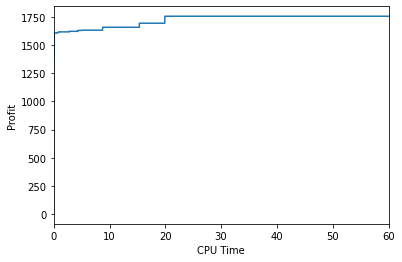

In [39]:
result=np.zeros((n,b))
iteration=0
best_value=0
start=time.time()
end=time.time()
time_list=[0]
value_list=[0]

while end-start<60:
    #randomly generate a result
    for i in range(n):
        #whether to put the item in a knapsack
        a=random.randint(0,3)
        if a==1:
            #decide to put in which knapsack
            j=random.randint(0,b-1)
            result[i,j]=1
    
    #check whether the result is valid
    valid=True
    overweight={}
    for i in range(b):
        weight=0
        for j in range(n):
            weight+=wj[j]*result[j,i]
        if weight>c:
            valid=False
            overweight[i]=weight
    
    #randomly remove items until it meets the constraint
    if valid==False:
        for i,w in overweight.items():
            in_bag=[]
            for j in range(n):
                if result[j,i]==1:
                    in_bag.append(j)
            while w>c:
                a=random.randint(0,len(in_bag)-1)
                result[in_bag[a],i]=0
                w-=wj[in_bag[a]]
                in_bag.pop(a)

    #calculate the new value
    cur_value=0
    for i in range(n):
        for j in range(b):
            cur_value+=vj[i]*result[i,j]
    if cur_value>best_value:
        best_value=cur_value
    end=time.time()
    time_list.append(end-start)
    value_list.append(best_value)
print(final_table(result))
plt.xlabel('CPU Time')
plt.ylabel('Profit')
plt.xlim((0,60))
plt.plot(time_list,value_list)

Local Search: Choose 1 random neighbour

  Container                     Packages  Profit Weight
0         1             [64, 68, 75, 92]   258.0     47
1         2             [38, 42, 56, 58]   241.0     49
2         3             [25, 73, 74, 81]   194.0     49
3         4  [1, 13, 28, 37, 51, 52, 53]   402.0     50
4         5             [22, 23, 78, 96]   253.0     50
5     Total                               1348.0       


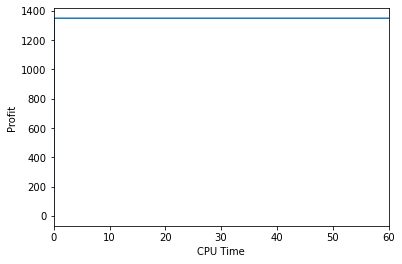

In [19]:
result=np.zeros((n,b))
iteration=0
best_value=0
start=time.time()
time_list=[0]
value_list=[0]

#generate a random solution
for i in range(n):
    #whether to put the item in a knapsack
    a=random.randint(0,50)
    if a==1:
        #decide to put in which knapsack
        j=random.randint(0,b-1)
        result[i,j]=1
    
#check whether the result is valid
valid=True
overweight={}
for i in range(b):
    weight=0
    for j in range(n):
        weight+=wj[j]*result[j,i]
    if weight>c:
        valid=False
        overweight[i]=weight
    
#randomly remove items until it meets the constraint
if valid==False:
    for i,w in overweight.items():
        in_bag=[]
        for j in range(n):
            if result[j,i]==1:
                in_bag.append(j)
        while w>c:
            a=random.randint(0,len(in_bag)-1)
            result[in_bag[a],i]=0
            w-=wj[in_bag[a]]
            in_bag.pop(a)

end=time.time()
while end-start<60:
    pre_result=copy.deepcopy(result)
    
    #choose which item to change
    i=random.randint(0,n-1)
    
    #check whether the item is already put in a bag, if so, remove it.
    for j in range(b):
        if result[i,j]==1:
            result[i,j]=0
            
    #choose a random bag to put it in
    j=random.randint(0,b-1)
    result[i,j]=1
    
    #check whether the result is valid
    valid=True
    for i in range(b):
        weight=0
        for j in range(n):
            weight+=wj[j]*result[j,i]
        if weight>c:
            valid=False
            result=pre_result
    
    #calculate the new value
    if valid==True:
        cur_value=0
        for i in range(n):
            for j in range(b):
                cur_value+=vj[i]*result[i,j]
        if cur_value>best_value:
            best_value=cur_value
        else:
            result=pre_result
    end=time.time()
    time_list.append(end-start)
    value_list.append(best_value)

print(final_table(result))
plt.xlabel('CPU Time')
plt.ylabel('Profit')
plt.xlim((0,60))
plt.plot(time_list,value_list)

Simulated Annealing

  Container              Packages  Profit Weight
0         1  [10, 25, 42, 52, 77]   235.0     50
1         2       [5, 22, 51, 54]   235.0     49
2         3           [2, 62, 84]   175.0     49
3         4  [12, 14, 30, 41, 70]   256.0     47
4         5  [13, 28, 38, 49, 91]   347.0     48
5     Total                        1248.0       


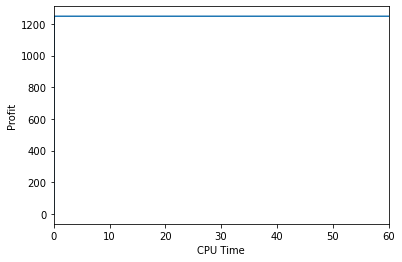

In [44]:
result=np.zeros((n,b))
iteration=0
best_value=0
start=time.time()
time_list=[0]
value_list=[0]
T=1000

#generate a random solution
for i in range(n):
    #whether to put the item in a knapsack
    a=random.randint(0,50)
    if a==1:
        #decide to put in which knapsack
        j=random.randint(0,b-1)
        result[i,j]=1
    
#check whether the result is valid
valid=True
overweight={}
for i in range(b):
    weight=0
    for j in range(n):
        weight+=wj[j]*result[j,i]
    if weight>c:
        valid=False
        overweight[i]=weight
    
#randomly remove items until it meets the constraint
if valid==False:
    for i,w in overweight.items():
        in_bag=[]
        for j in range(n):
            if result[j,i]==1:
                in_bag.append(j)
        while w>c:
            a=random.randint(0,len(in_bag)-1)
            result[in_bag[a],i]=0
            w-=wj[in_bag[a]]
            in_bag.pop(a)

end=time.time()
while end-start<60:
    pre_result=copy.deepcopy(result)
    
    #choose which item to change
    i=random.randint(0,n-1)
    
    #check whether the item is already put in a bag, if so, remove it.
    for j in range(b):
        if result[i,j]==1:
            result[i,j]=0
            
    #choose a random bag to put it in
    j=random.randint(0,b-1)
    result[i,j]=1
    
    #check whether the result is valid
    valid=True
    for i in range(b):
        weight=0
        for j in range(n):
            weight+=wj[j]*result[j,i]
        if weight>c:
            valid=False
            result=pre_result
    
    #calculate the new value
    if valid==True:
        cur_value=0
        for i in range(n):
            for j in range(b):
                cur_value+=vj[i]*result[i,j]
        p=random.random()
        if cur_value>best_value or p<math.exp((cur_value-best_value)/T):
            best_value=cur_value
        else:
            result=pre_result
    end=time.time()
    time_list.append(end-start)
    value_list.append(best_value)
    T=0.9*T

print(final_table(result))
plt.xlabel('CPU Time')
plt.ylabel('Profit')
plt.xlim((0,60))
plt.plot(time_list,value_list)